# D206 Performance Assessment

Through this notebook, I go through the data cleaning process on the churn dataset
Student ID:012047746

In [1]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


## Import Libraries and Data

In [2]:
# start by importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
# for visualizations
import missingno as msno
import matplotlib.pyplot as plt
# stats
import scipy.stats as stats
# for principal component analysis
from sklearn.decomposition import PCA

In [3]:
# read in csv
df = pd.read_csv('churn_raw_data.csv')

In [4]:
# create a copy of the original df for comparison later
odf = df

In [5]:
# drop the unnamed column as it has no use
df = df.drop(columns=['Unnamed: 0'])
df.head()

CaseOrder Customer_id                           Interaction         City  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b  Point Baker   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524  West Branch   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35      Yamhill   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311      Del Mar   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574    Needville   

  State                 County    Zip       Lat        Lng  Population  ...  \
0    AK  Prince of Wales-Hyder  99927  56.25100 -133.37571          38  ...   
1    MI                 Ogemaw  48661  44.32893  -84.24080       10446  ...   
2    OR                Yamhill  97148  45.35589 -123.24657        3735  ...   
3    CA              San Diego  92014  32.96687 -117.24798       13863  ...   
4    TX              Fort Bend  77461  29.38012  -95.80673       11352  ...   

  MonthlyCharge Bandwidth_GB_Year item1  item2  item3 item4 item5  item6  \
0    171.449762        904.536110     5      5      5     3     4      4   
1    242.948015        800.982766     3      4      3     3     4      3   
2    159.440398       2054.706961     4      4      2     4     4      3   
3    120.249493       2164.579412     4      4      4     2     5      4   
4    150.761216        271.493436     4      4      4     3     4      4   

  item7 item8  
0     3     4  
1     4     4  
2     3     3  
3     3     3  
4     4     5  

[5 rows x 51 columns]

In [6]:
# check df columns and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

## C4. Code For Detecting Duplicates, Missing Values, and Outliers

### Detecting duplicates

We don't want duplciated in id columns so I verify these 

In [7]:
# counts number of rows with duplicates
df['Customer_id'].duplicated().sum()

0

In [8]:
# counts number of rows with duplicates
df['Interaction'].duplicated().sum()

0

### Detecting Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

In [10]:
# lists count of nulls for each column
df.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

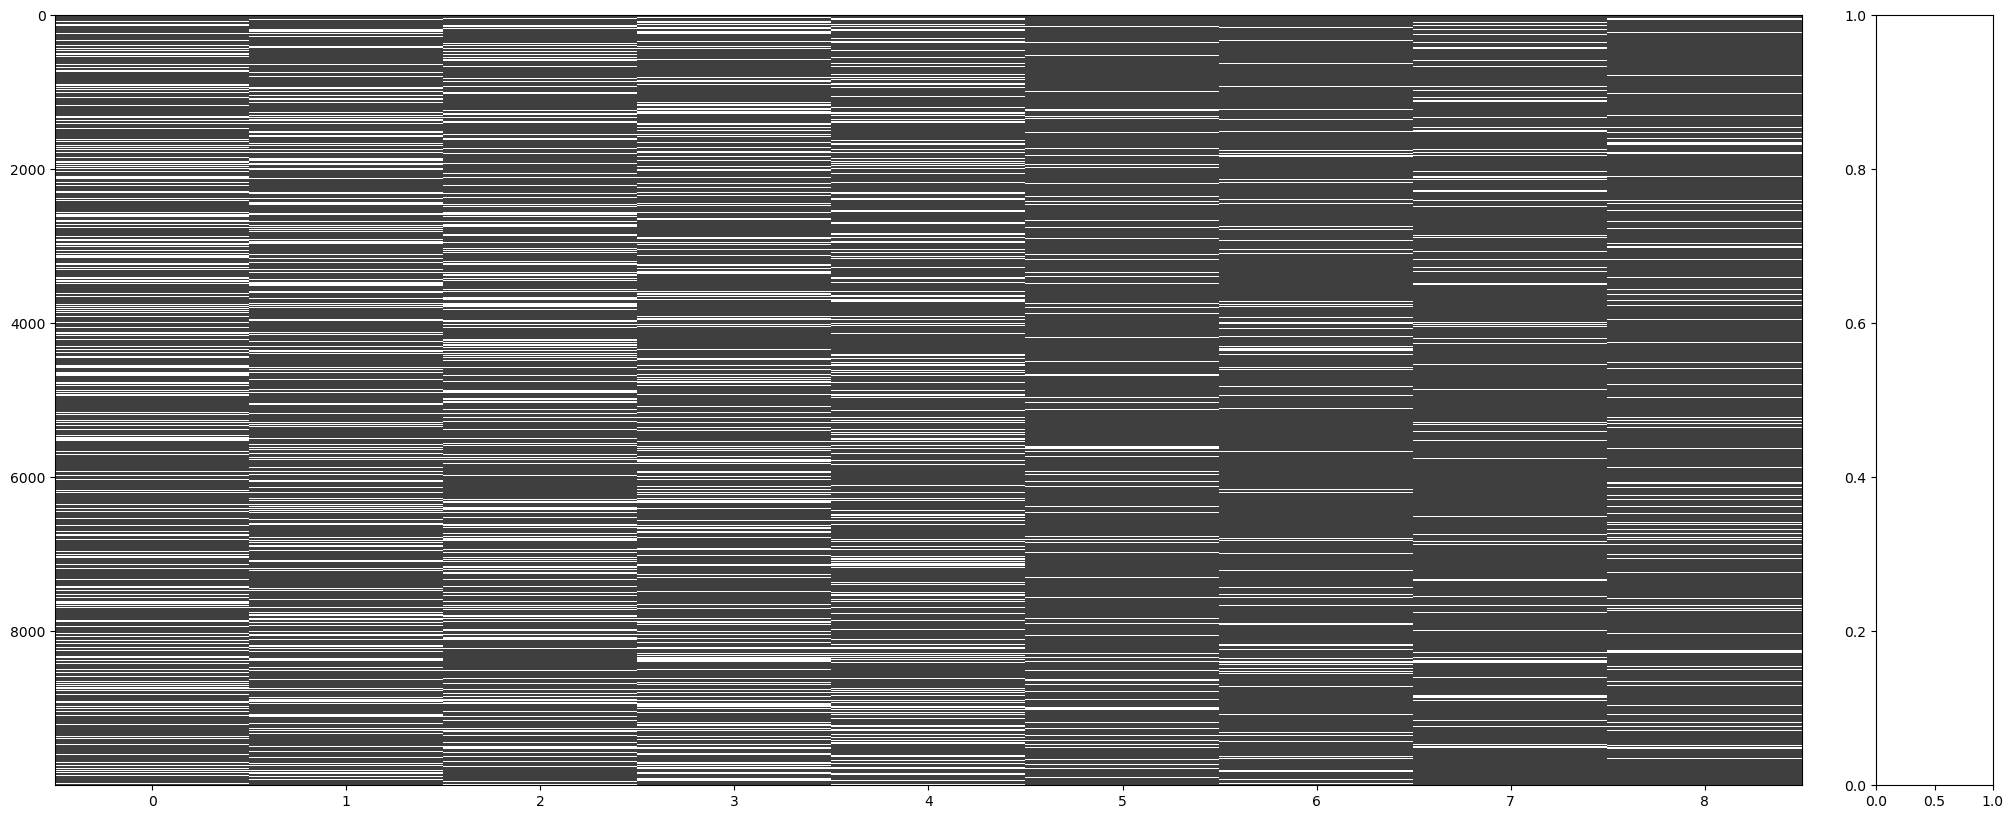

In [11]:
# using missingno to create a matrix to look at missing values. Error caused from importing missingno thorugh jupyter using old version
#msno.matrix(df[["Children","Age","Income","Techie","InternetService","Phone","TechSupport","Tenure","Bandwidth_GB_Year"]])

### Detecting Outliers

Outliers can be tested for all quantitative variables. This includes population, children, income, outage_sec_perweek, email, contacts, yearly_equip_failure, tenure, MonthlyChargge, and Bandwidth_GB_year

In [12]:
test_df = df

In [13]:
# create zscore for population 
test_df['zs_population']=stats.zscore(test_df['Population'],nan_policy='omit')
test_df[['Population','zs_population']].head

<bound method NDFrame.head of       Population  zs_population
0             38      -0.673405
1          10446       0.047772
2           3735      -0.417238
3          13863       0.284537
4          11352       0.110549
...          ...            ...
9995         640      -0.631692
9996       77168       4.670977
9997         406      -0.647906
9998       35575       1.788974
9999       12230       0.171386

[10000 rows x 2 columns]>

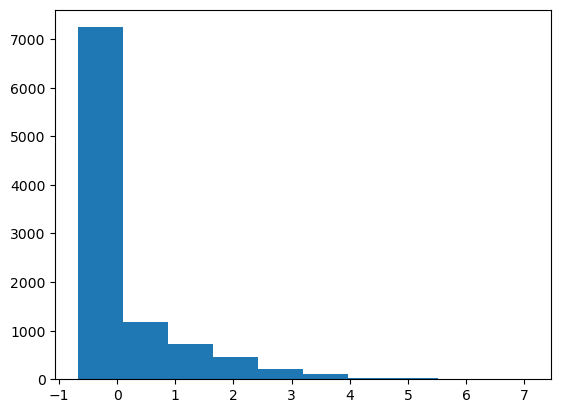

In [14]:
# create hist
plt.hist(test_df['zs_population'])
plt.show()

In [15]:
#create zscore for children
test_df['zs_children']=stats.zscore(test_df['Children'],nan_policy='omit')
test_df[['Children','zs_children']].head

<bound method NDFrame.head of       Children  zs_children
0          NaN          NaN
1          1.0    -0.508646
2          4.0     0.883715
3          1.0    -0.508646
4          0.0    -0.972766
...        ...          ...
9995       3.0     0.419594
9996       4.0     0.883715
9997       NaN          NaN
9998       1.0    -0.508646
9999       1.0    -0.508646

[10000 rows x 2 columns]>

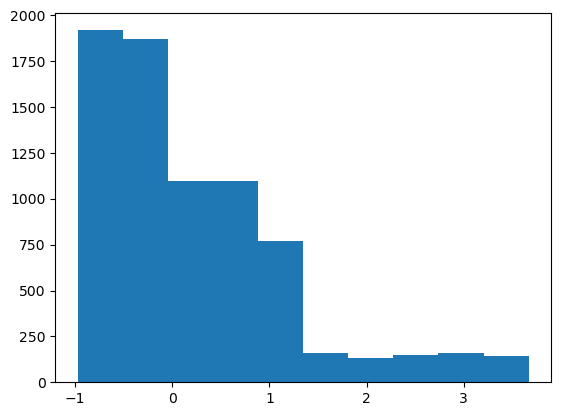

In [16]:
# create histogram for children
plt.hist(test_df['zs_children'])
plt.show()

In [17]:
# create zscore for income
test_df['zs_income']=stats.zscore(test_df['Income'],nan_policy='omit')
test_df[['Income','zs_income']].head

<bound method NDFrame.head of         Income  zs_income
0     28561.99  -0.401133
1     21704.77  -0.642955
2          NaN        NaN
3     18925.23  -0.740976
4     40074.19   0.004846
...        ...        ...
9995  55723.74   0.556731
9996       NaN        NaN
9997       NaN        NaN
9998  16667.58  -0.820592
9999       NaN        NaN

[10000 rows x 2 columns]>

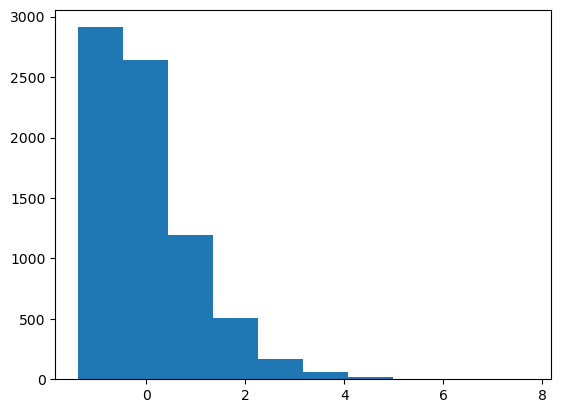

In [18]:
# create histogram for income
plt.hist(test_df['zs_income'])
plt.show()

In [19]:
# calculate the z scores for outage
test_df['zs_outage']=stats.zscore(test_df['Outage_sec_perweek'],nan_policy='omit')
test_df[['Outage_sec_perweek','zs_outage']].head

<bound method NDFrame.head of       Outage_sec_perweek  zs_outage
0               6.972566  -0.637726
1              12.014541   0.079935
2              10.245616  -0.171849
3              15.206193   0.534225
4               8.960316  -0.354795
...                  ...        ...
9995            9.265392  -0.311372
9996            8.115849  -0.474994
9997            4.837696  -0.941598
9998           12.076460   0.088748
9999           12.641760   0.169211

[10000 rows x 2 columns]>

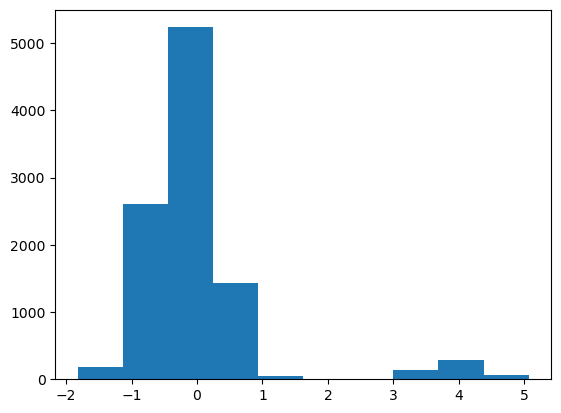

In [20]:
# plot the histogram for outage
plt.hist(test_df['zs_outage'])
plt.show()

In [21]:
# calculate the zscores
test_df['zs_email']=stats.zscore(test_df['Email'],nan_policy='omit')
test_df[['Email','zs_email']].head

<bound method NDFrame.head of       Email  zs_email
0        10 -0.666282
1        12 -0.005288
2         9 -0.996779
3        15  0.986203
4        16  1.316700
...     ...       ...
9995     12 -0.005288
9996     15  0.986203
9997     10 -0.666282
9998     14  0.655706
9999     17  1.647197

[10000 rows x 2 columns]>

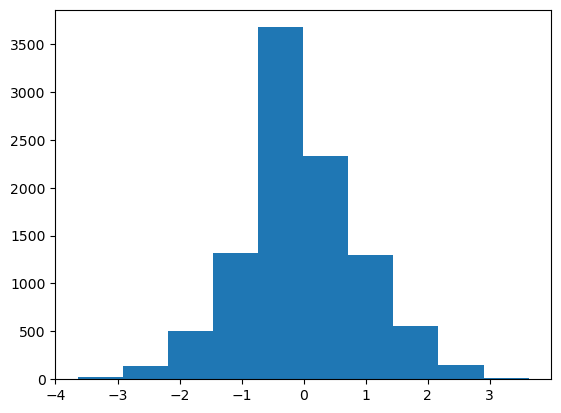

In [22]:
# plot the histogram for email
plt.hist(test_df['zs_email'])
plt.show()

In [23]:
# calculate zscores
test_df['zs_contacts']=stats.zscore(test_df['Contacts'],nan_policy='omit')
test_df[['Contacts','zs_contacts']].head

<bound method NDFrame.head of       Contacts  zs_contacts
0            0    -1.005852
1            0    -1.005852
2            0    -1.005852
3            2     1.017588
4            2     1.017588
...        ...          ...
9995         2     1.017588
9996         2     1.017588
9997         0    -1.005852
9998         1     0.005868
9999         1     0.005868

[10000 rows x 2 columns]>

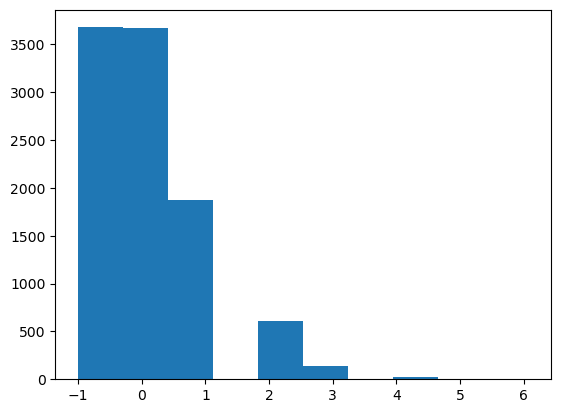

In [24]:
# plot histogram for contacts
plt.hist(test_df['zs_contacts'])
plt.show()

In [25]:
#calculate zscore for yearly failure
test_df['zs_yearly_failure']=stats.zscore(test_df['Yearly_equip_failure'],nan_policy='omit')
test_df[['Yearly_equip_failure','zs_yearly_failure']].head

<bound method NDFrame.head of       Yearly_equip_failure  zs_yearly_failure
0                        1           0.946658
1                        1           0.946658
2                        1           0.946658
3                        0          -0.625864
4                        1           0.946658
...                    ...                ...
9995                     0          -0.625864
9996                     0          -0.625864
9997                     0          -0.625864
9998                     0          -0.625864
9999                     0          -0.625864

[10000 rows x 2 columns]>

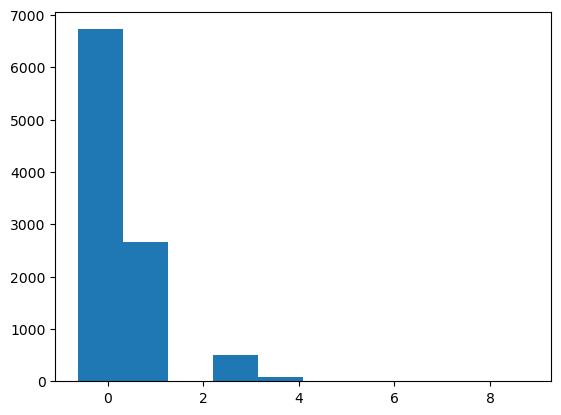

In [26]:
# plot histogram for yearly failure
plt.hist(test_df['zs_yearly_failure'])
plt.show()

In [27]:
# calculate zscore for tenure
test_df['zs_tenure']=stats.zscore(test_df['Tenure'],nan_policy='omit')
test_df[['Tenure','zs_tenure']].head

<bound method NDFrame.head of          Tenure  zs_tenure
0      6.795513  -1.047883
1      1.156681  -1.261172
2     15.754144  -0.709021
3     17.087227  -0.658597
4      1.670972  -1.241719
...         ...        ...
9995  68.197130   1.274642
9996  61.040370   1.003936
9997        NaN        NaN
9998  71.095600   1.384277
9999  63.350860   1.091331

[10000 rows x 2 columns]>

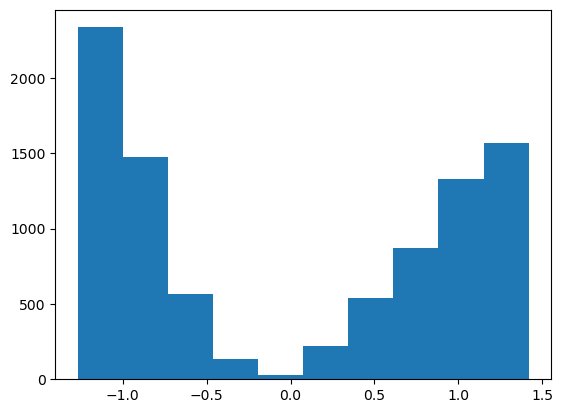

In [28]:
# plto histogram for tenure
plt.hist(test_df['zs_tenure'])
plt.show()

In [29]:
test_df['zs_monthlycharge']=stats.zscore(test_df['MonthlyCharge'],nan_policy='omit')
test_df[['MonthlyCharge','zs_monthlycharge']].head

<bound method NDFrame.head of       MonthlyCharge  zs_monthlycharge
0        171.449762         -0.060613
1        242.948015          1.589348
2        159.440398         -0.337752
3        120.249493         -1.242158
4        150.761216         -0.538041
...             ...               ...
9995     159.828800         -0.328789
9996     208.856400          0.802618
9997     168.220900         -0.135125
9998     252.628600          1.812746
9999     218.371000          1.022186

[10000 rows x 2 columns]>

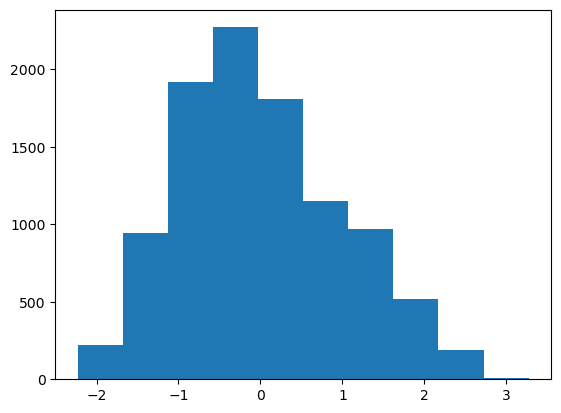

In [30]:
# plot histogram for monthly charge
plt.hist(test_df['zs_monthlycharge'])
plt.show()

In [31]:
# calculate z score for bandwidth
test_df['zs_bandwidth']=stats.zscore(test_df['Bandwidth_GB_Year'],nan_policy='omit')
test_df[['Bandwidth_GB_Year','zs_bandwidth']].head

<bound method NDFrame.head of       Bandwidth_GB_Year  zs_bandwidth
0            904.536110     -1.140372
1            800.982766     -1.187715
2           2054.706961     -0.614525
3           2164.579412     -0.564293
4            271.493436     -1.429792
...                 ...           ...
9995        6511.253000      1.422962
9996        5695.952000      1.050215
9997        4159.306000      0.347676
9998        6468.457000      1.403397
9999        5857.586000      1.124113

[10000 rows x 2 columns]>

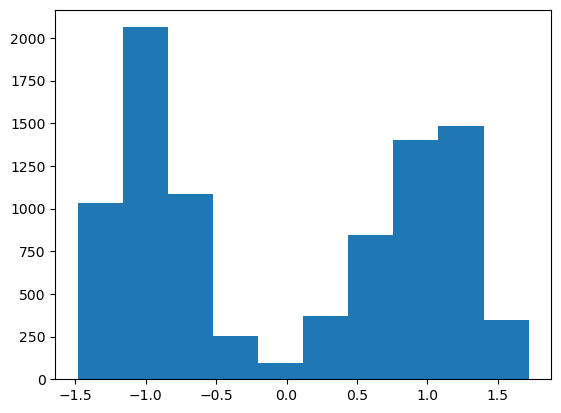

In [32]:
# plot histogram
plt.hist(test_df['zs_bandwidth'])
plt.show()

In [33]:
test_df['zs_age']=stats.zscore(test_df['Age'],nan_policy='omit')
test_df[['Age','zs_age']].head

<bound method NDFrame.head of        Age    zs_age
0     68.0  0.709515
1     27.0 -1.266146
2     50.0 -0.157848
3     48.0 -0.254222
4     83.0  1.432318
...    ...       ...
9995   NaN       NaN
9996  48.0 -0.254222
9997   NaN       NaN
9998  39.0 -0.687903
9999  28.0 -1.217959

[10000 rows x 2 columns]>

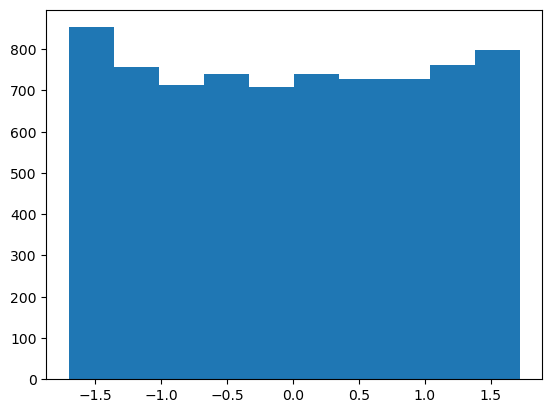

In [34]:
plt.hist(test_df['zs_age'])
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

In [36]:
# drop extra columns
df = df.drop(['zs_population','zs_children','zs_income','zs_outage','zs_email','zs_contacts','zs_yearly_failure','zs_tenure','zs_monthlycharge','zs_bandwidth','zs_age'],axis=1)

## D4. Treatment of Duplicates, Nulls, and Outliers

### Treating Nulls

(array([1919., 1874., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

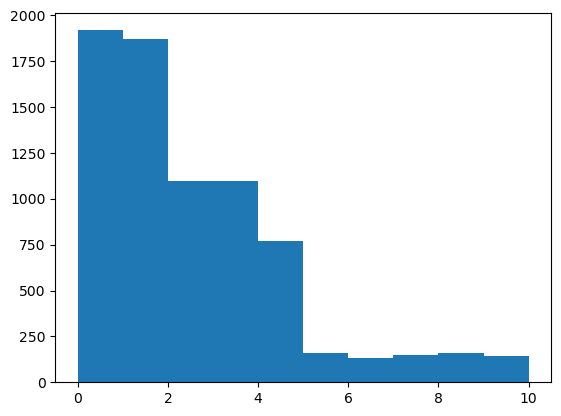

In [37]:
# plotting histogram of children
plt.hist(df["Children"])

In [38]:
# replacing null values with medinan because data is skewed right
df["Children"] = df["Children"].fillna(df["Children"].median())

(array([853., 756., 714., 739., 708., 739., 728., 728., 761., 799.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

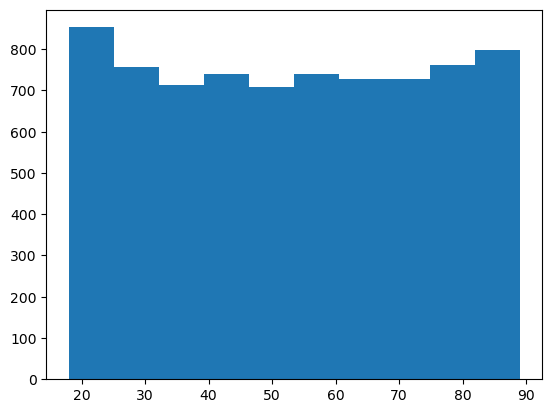

In [39]:
# histogram for age
plt.hist(df["Age"])

In [40]:
# replacing null values with mean because data is uniform
df["Age"] = df["Age"].fillna(df["Age"].mean())
# age need to be int
df['Age'] = df['Age'].astype(int)

(array([2.912e+03, 2.642e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([   740.66 ,  26556.664,  52372.668,  78188.672, 104004.676,
        129820.68 , 155636.684, 181452.688, 207268.692, 233084.696,
        258900.7  ]),
 <BarContainer object of 10 artists>)

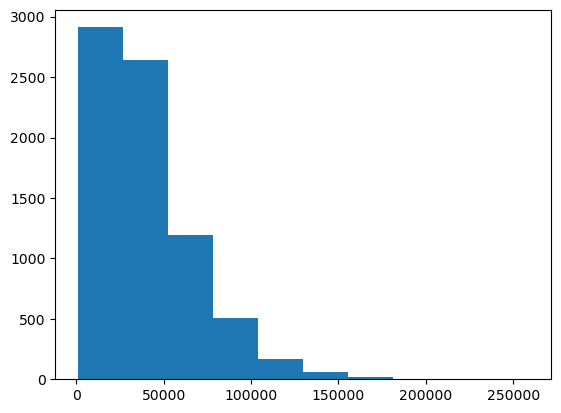

In [41]:
# histogram for income
plt.hist(df["Income"])

In [42]:
# replacing null values with median because data is skewed right
df["Income"] = df["Income"].fillna(df["Income"].median())

(array([2337., 1473.,  568.,  132.,   30.,  221.,  540.,  870., 1330.,
        1568.]),
 array([ 1.00025934,  8.10016141, 15.20006347, 22.29996554, 29.3998676 ,
        36.49976967, 43.59967174, 50.6995738 , 57.79947587, 64.89937793,
        71.99928   ]),
 <BarContainer object of 10 artists>)

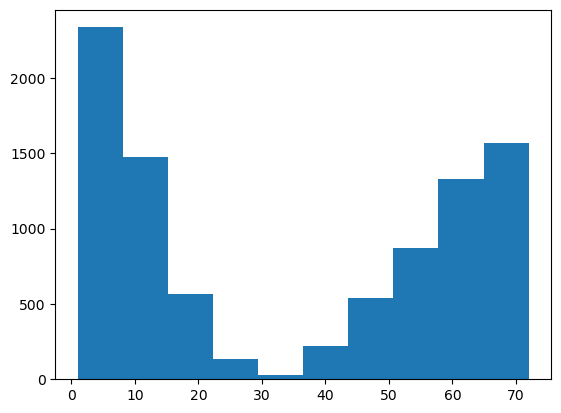

In [43]:
# histogram for tenure
plt.hist(df["Tenure"])

In [44]:
# replacing null values with mean because data is bimodal
df["Tenure"] = df["Tenure"].fillna(df["Tenure"].mean())

(array([1031., 2062., 1087.,  255.,   98.,  370.,  844., 1399., 1484.,
         349.]),
 array([ 155.5067148 ,  855.85424332, 1556.20177184, 2256.54930036,
        2956.89682888, 3657.2443574 , 4357.59188592, 5057.93941444,
        5758.28694296, 6458.63447148, 7158.982     ]),
 <BarContainer object of 10 artists>)

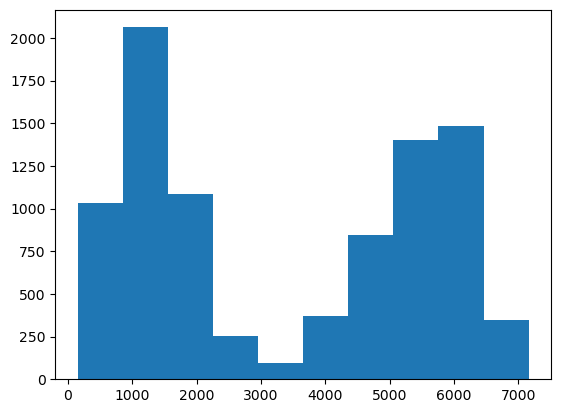

In [45]:
# histogram for bandwidth
plt.hist(df["Bandwidth_GB_Year"])

In [46]:
# replacing null values with mean because float data does not have a mode
df["Bandwidth_GB_Year"] = df["Bandwidth_GB_Year"].fillna(df["Bandwidth_GB_Year"].mean())

In [47]:
# check mode for techie
df["Techie"].mode(dropna=True)

0    No
Name: Techie, dtype: object

In [48]:
# replace techie with most frequent data because it is categorical
df["Techie"] = df["Techie"].fillna("No")

In [49]:
# check mode for InternetService
df["InternetService"].mode(dropna=True)

0    Fiber Optic
Name: InternetService, dtype: object

In [50]:
# replace InternetService with most frequent data because it is categorical
df["InternetService"] = df["InternetService"].fillna("Fiber Optic")

In [51]:
# check mode for Phone
df["Phone"].mode(dropna=True)

0    Yes
Name: Phone, dtype: object

In [52]:
# replace Phone with most frequent data because it is categorical
df["Phone"] = df["Phone"].fillna("Yes")

In [53]:
# check mode for TechSupport
df["TechSupport"].mode(dropna=True)

0    No
Name: TechSupport, dtype: object

In [54]:
# replace TechSupport with most frequent data because it is categorical
df["TechSupport"] = df["TechSupport"].fillna("No")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  float64
 14  Age                   10000 non-null  int32  
 15  Education           

### Treat Outliers

In [56]:
# create nulls for outliers in population
test_df['Population'] = np.where(test_df['zs_population'] > 2, np.nan, test_df['Population'])
test_df['Population'] = np.where(test_df['zs_population'] < -2, np.nan, test_df['Population'])

In [58]:
# use fillna function to impute outliers with median because histogram is skewed right
test_df['Population'] = test_df['Population'].fillna(test_df['Population'].median())
df['Population'] = test_df['Population']

In [59]:
# create nulls for outliers in children
test_df['Children'] = np.where(test_df['zs_children'] > 2, np.nan, test_df['Children'])
test_df['Children'] = np.where(test_df['zs_children'] < -2, np.nan, test_df['Children'])

In [60]:
# use fillna function to impute outliers with median because histogram is skewed right
test_df['Children'] = test_df['Children'].fillna(test_df['Children'].median())
df['Children'] = test_df['Children']

In [61]:
# create nulls for outliers in income
test_df['Income'] = np.where(test_df['zs_income'] > 2, np.nan, test_df['Income'])
test_df['Income'] = np.where(test_df['zs_income'] < -2, np.nan, test_df['Income'])

In [62]:
# use fillna function to impute outliers with median because histogram is skewed right
test_df['Income'] = test_df['Income'].fillna(test_df['Income'].median())
df['Income'] = test_df['Income']

In [63]:
# create nulls for outliers 
test_df['Outage_sec_perweek'] = np.where(test_df['zs_outage'] > 2, np.nan, test_df['Outage_sec_perweek'])
test_df['Outage_sec_perweek'] = np.where(test_df['zs_outage'] < -2, np.nan, test_df['Outage_sec_perweek'])

In [64]:
# use fillna function to impute outliers with mean because histogram is normally distributed
test_df['Outage_sec_perweek'] = test_df['Outage_sec_perweek'].fillna(test_df['Outage_sec_perweek'].mean())
df['Outage_sec_perweek'] = test_df['Outage_sec_perweek']

In [65]:
# create nulls for outliers 
test_df['Email'] = np.where(test_df['zs_email'] > 2, np.nan, test_df['Email'])
test_df['Email'] = np.where(test_df['zs_email'] < -2, np.nan, test_df['Email'])

In [66]:
# use fillna function to impute outliers with mean because histogram is normally distributed
test_df['Email'] = test_df['Email'].fillna(test_df['Email'].mean())
df['Email'] = test_df['Email']
df['Email'] = df['Email'].astype(int)

In [67]:
# create nulls for outliers 
test_df['Contacts'] = np.where(test_df['zs_contacts'] > 2, np.nan, test_df['Contacts'])
test_df['Contacts'] = np.where(test_df['zs_contacts'] < -2, np.nan, test_df['Contacts'])

In [68]:
# use fillna function to impute outliers with median because histogram is skewed right
test_df['Contacts'] = test_df['Contacts'].fillna(test_df['Contacts'].median())
df['Contacts'] = test_df['Contacts']

In [69]:
# create nulls for outliers 
test_df['Yearly_equip_failure'] = np.where(test_df['zs_yearly_failure'] > 2, np.nan, test_df['Yearly_equip_failure'])
test_df['Yearly_equip_failure'] = np.where(test_df['zs_yearly_failure'] < -2, np.nan, test_df['Yearly_equip_failure'])

In [70]:
# use fillna function to impute outliers with median because histogram is skewed right
test_df['Yearly_equip_failure'] = test_df['Yearly_equip_failure'].fillna(test_df['Yearly_equip_failure'].median())
df['Yearly_equip_failure'] = test_df['Yearly_equip_failure']

In [71]:
# create nulls for outliers 
test_df['MonthlyCharge'] = np.where(test_df['zs_monthlycharge'] > 2, np.nan, test_df['MonthlyCharge'])
test_df['MonthlyCharge'] = np.where(test_df['zs_monthlycharge'] < -2, np.nan, test_df['MonthlyCharge'])

In [72]:
# use fillna function to impute outliers with mean because histogram is normally distributed
test_df['MonthlyCharge'] = test_df['MonthlyCharge'].fillna(test_df['MonthlyCharge'].mean())
df['MonthlyCharge'] = test_df['MonthlyCharge']

### D3. Summary of Outcomes

First we begin by checking if there are any nulls left

In [73]:
# lists count of nulls for each column. verify all columns have no nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  float64
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  float64
 14  Age                   10000 non-null  int32  
 15  Education           

(array([7.243e+03, 1.178e+03, 7.340e+02, 4.610e+02, 2.090e+02, 1.050e+02,
        3.500e+01, 2.400e+01, 8.000e+00, 3.000e+00]),
 array([     0.,  11185.,  22370.,  33555.,  44740.,  55925.,  67110.,
         78295.,  89480., 100665., 111850.]),
 <BarContainer object of 10 artists>)

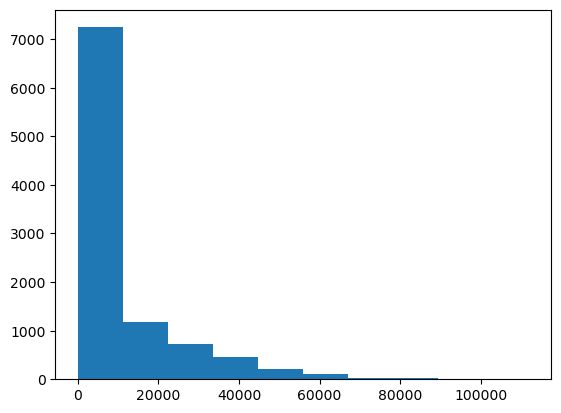

In [74]:
# histogram for population
plt.hist(odf["Population"])

(array([6129., 1156.,  619.,  457.,  398.,  324.,  286.,  252.,  191.,
         188.]),
 array([    0.,  3862.,  7724., 11586., 15448., 19310., 23172., 27034.,
        30896., 34758., 38620.]),
 <BarContainer object of 10 artists>)

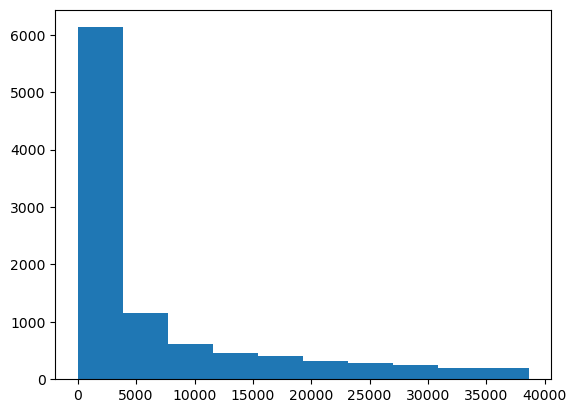

In [75]:
# original histogram for population
plt.hist(df["Population"])

(array([1919., 4820.,    0., 1100.,    0., 1096.,  769.,    0.,  161.,
         135.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

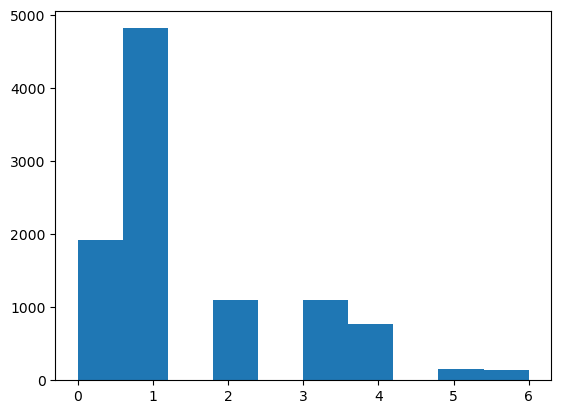

In [76]:
# histogram for children
plt.hist(df["Children"])

(array([1919., 1874., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

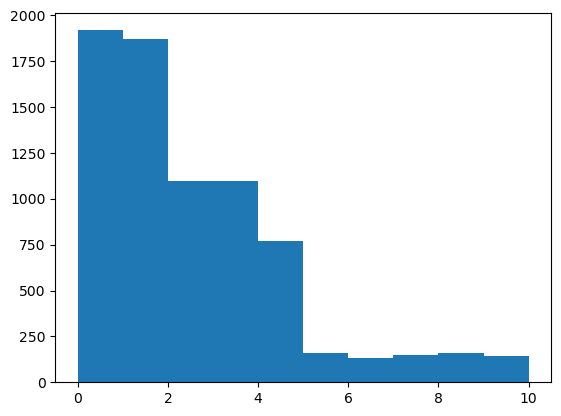

In [77]:
# original histogram for children
plt.hist(odf["Children"])

(array([ 684., 1277., 1336., 3984.,  853.,  659.,  435.,  334.,  279.,
         159.]),
 array([  740.66 , 10329.022, 19917.384, 29505.746, 39094.108, 48682.47 ,
        58270.832, 67859.194, 77447.556, 87035.918, 96624.28 ]),
 <BarContainer object of 10 artists>)

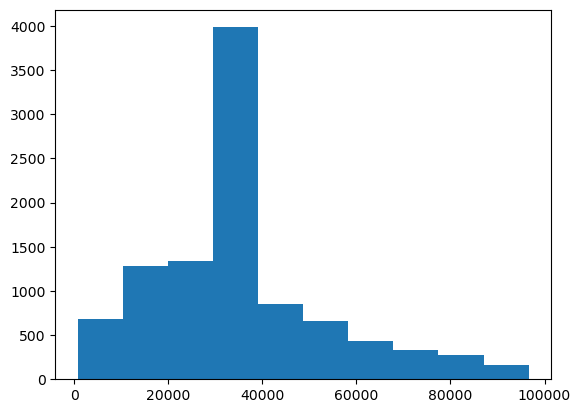

In [78]:
# histogram for income
plt.hist(df["Income"])

(array([2.912e+03, 2.642e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([   740.66 ,  26556.664,  52372.668,  78188.672, 104004.676,
        129820.68 , 155636.684, 181452.688, 207268.692, 233084.696,
        258900.7  ]),
 <BarContainer object of 10 artists>)

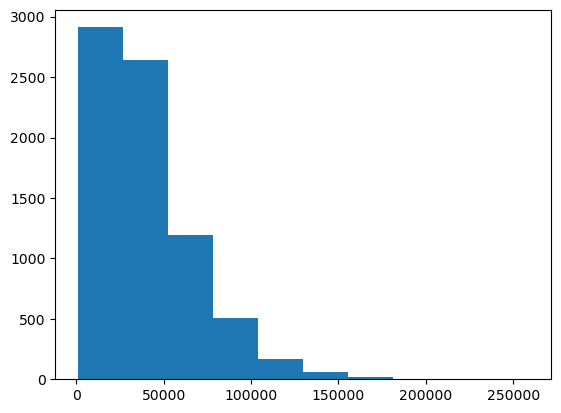

In [79]:
# original histogram for income
plt.hist(odf["Income"])

(array([  18.,  112.,  549., 1475., 2530., 3055., 1511.,  599.,  137.,
          14.]),
 array([-1.348571 ,  0.9079051,  3.1643812,  5.4208573,  7.6773334,
         9.9338095, 12.1902856, 14.4467617, 16.7032378, 18.9597139,
        21.21619  ]),
 <BarContainer object of 10 artists>)

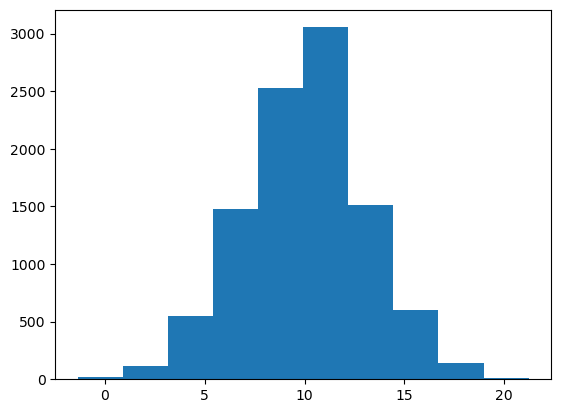

In [80]:
# histogram for outage_sec_perweek
plt.hist(df["Outage_sec_perweek"])

(array([ 176., 2605., 5237., 1428.,   54.,    0.,    9.,  144.,  282.,
          65.]),
 array([-1.348571 ,  3.4912141,  8.3309992, 13.1707843, 18.0105694,
        22.8503545, 27.6901396, 32.5299247, 37.3697098, 42.2094949,
        47.04928  ]),
 <BarContainer object of 10 artists>)

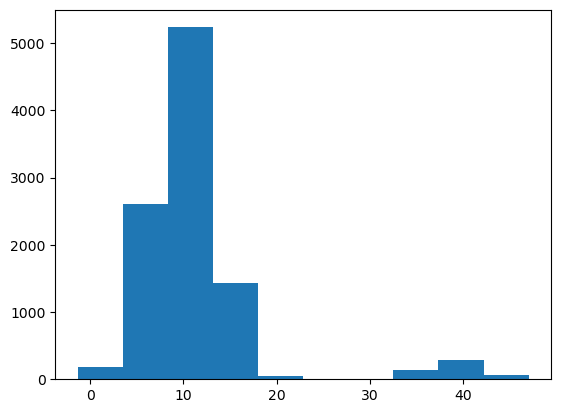

In [81]:
# original histogram for outage_sec_perweek
plt.hist(odf["Outage_sec_perweek"])

(array([ 501.,  543.,  774., 1074., 1291., 2907., 1060.,  779.,  517.,
         554.]),
 array([ 6. ,  7.2,  8.4,  9.6, 10.8, 12. , 13.2, 14.4, 15.6, 16.8, 18. ]),
 <BarContainer object of 10 artists>)

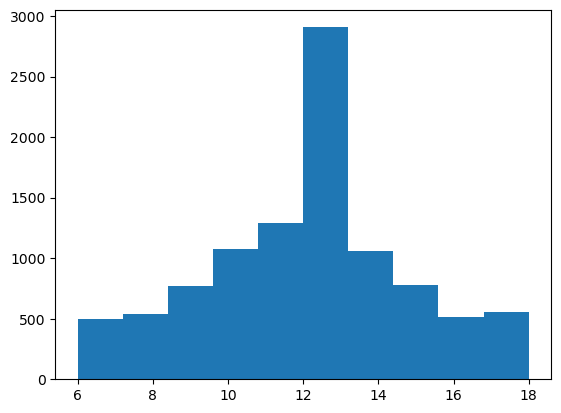

In [82]:
# histogram for email
plt.hist(df["Email"])

(array([  23.,  140.,  501., 1317., 2365., 3638., 1296.,  554.,  151.,
          15.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 10 artists>)

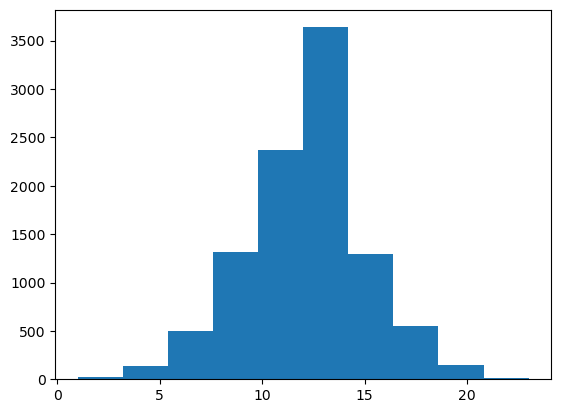

In [83]:
# original histogram for email
plt.hist(odf["Email"])

(array([3680.,    0.,    0.,    0.,    0., 4448.,    0.,    0.,    0.,
        1872.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

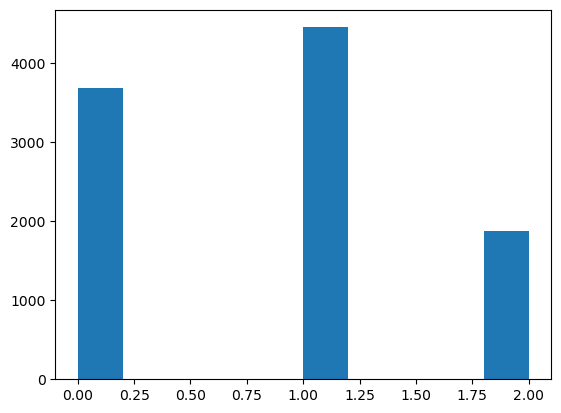

In [84]:
# histogram for contacts
plt.hist(df["Contacts"])

(array([3.680e+03, 3.675e+03, 1.872e+03, 0.000e+00, 6.080e+02, 1.370e+02,
        0.000e+00, 2.000e+01, 5.000e+00, 3.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

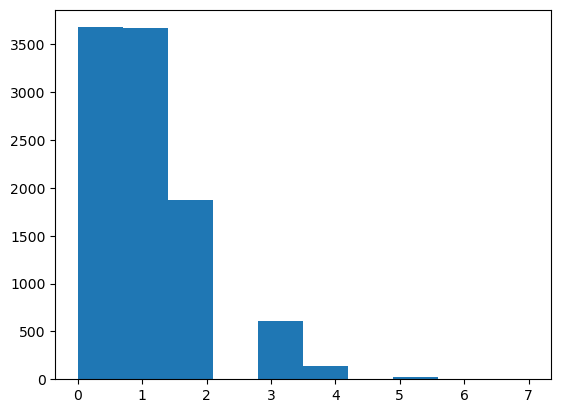

In [85]:
# histogram for contacts
plt.hist(odf["Contacts"])

(array([7330.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2670.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

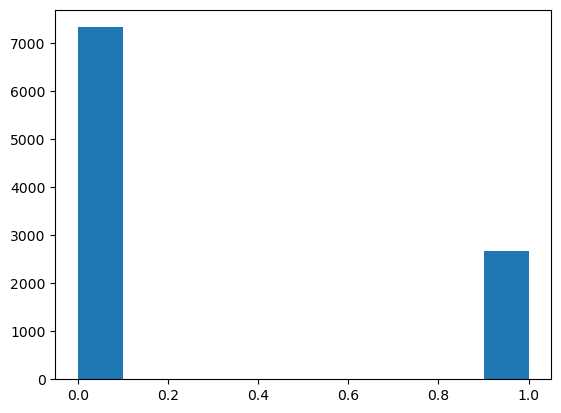

In [86]:
# histogram for Yearly_equip_failure
plt.hist(df["Yearly_equip_failure"])

(array([6.727e+03, 2.670e+03, 0.000e+00, 5.090e+02, 0.000e+00, 8.600e+01,
        7.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

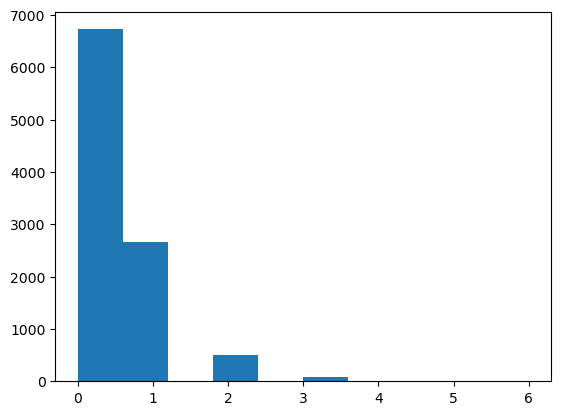

In [87]:
# original histogram for Yearly_equip_failure
plt.hist(odf["Yearly_equip_failure"])

(array([2337., 1473.,  568.,  132.,  961.,  221.,  540.,  870., 1330.,
        1568.]),
 array([ 1.00025934,  8.10016141, 15.20006347, 22.29996554, 29.3998676 ,
        36.49976967, 43.59967174, 50.6995738 , 57.79947587, 64.89937793,
        71.99928   ]),
 <BarContainer object of 10 artists>)

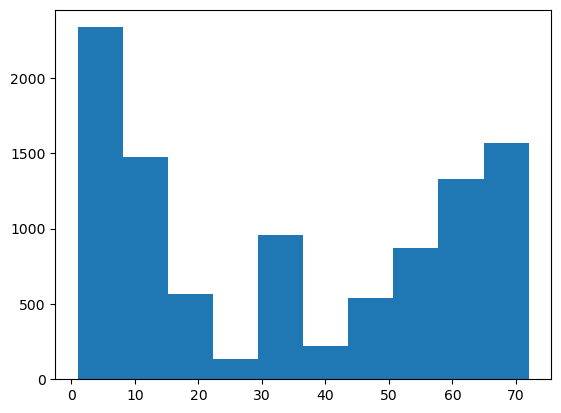

In [88]:
# histogram for tenure
plt.hist(df["Tenure"])

(array([2337., 1473.,  568.,  132.,   30.,  221.,  540.,  870., 1330.,
        1568.]),
 array([ 1.00025934,  8.10016141, 15.20006347, 22.29996554, 29.3998676 ,
        36.49976967, 43.59967174, 50.6995738 , 57.79947587, 64.89937793,
        71.99928   ]),
 <BarContainer object of 10 artists>)

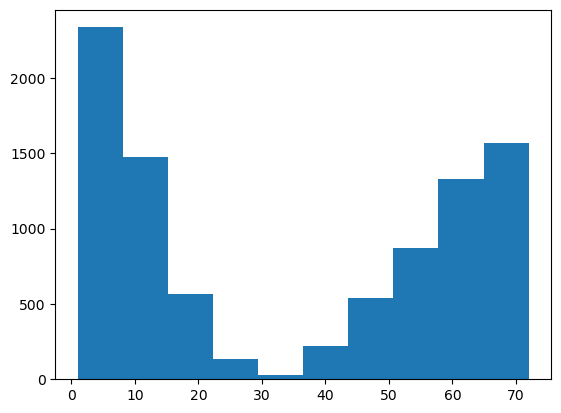

In [89]:
# original histogram for tenure
plt.hist(odf["Tenure"])

(array([ 359.,  655., 1417., 1395., 2109., 1213., 1006.,  764.,  635.,
         447.]),
 array([ 89.55752604, 106.67414344, 123.79076083, 140.90737823,
        158.02399562, 175.14061302, 192.25723042, 209.37384781,
        226.49046521, 243.6070826 , 260.7237    ]),
 <BarContainer object of 10 artists>)

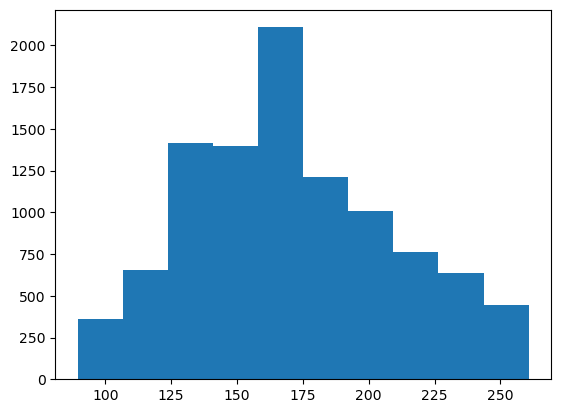

In [90]:
# histogram for MonthlyCharge
plt.hist(df["MonthlyCharge"])

(array([ 219.,  947., 1917., 2272., 1809., 1151.,  968.,  520.,  187.,
          10.]),
 array([ 77.50523 , 101.342567, 125.179904, 149.017241, 172.854578,
        196.691915, 220.529252, 244.366589, 268.203926, 292.041263,
        315.8786  ]),
 <BarContainer object of 10 artists>)

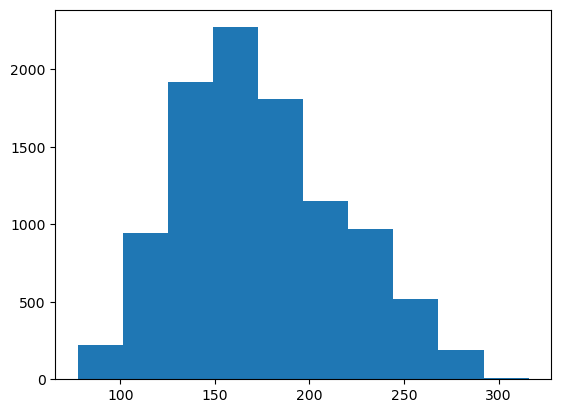

In [91]:
# original histogram for MonthlyCharge
plt.hist(odf["MonthlyCharge"])

(array([1031., 2062., 1087.,  255., 1119.,  370.,  844., 1399., 1484.,
         349.]),
 array([ 155.5067148 ,  855.85424332, 1556.20177184, 2256.54930036,
        2956.89682888, 3657.2443574 , 4357.59188592, 5057.93941444,
        5758.28694296, 6458.63447148, 7158.982     ]),
 <BarContainer object of 10 artists>)

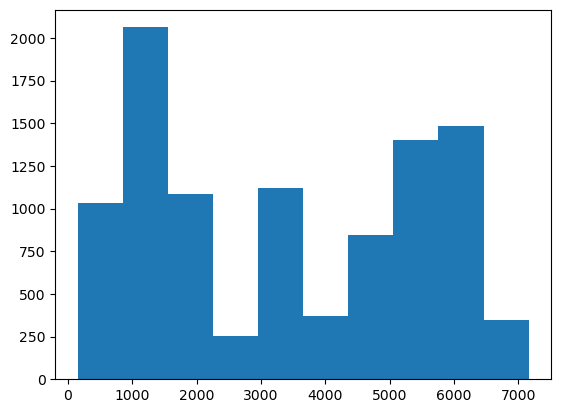

In [92]:
# histogram for Bandwidth_GB_year
plt.hist(df["Bandwidth_GB_Year"])

(array([1031., 2062., 1087.,  255.,   98.,  370.,  844., 1399., 1484.,
         349.]),
 array([ 155.5067148 ,  855.85424332, 1556.20177184, 2256.54930036,
        2956.89682888, 3657.2443574 , 4357.59188592, 5057.93941444,
        5758.28694296, 6458.63447148, 7158.982     ]),
 <BarContainer object of 10 artists>)

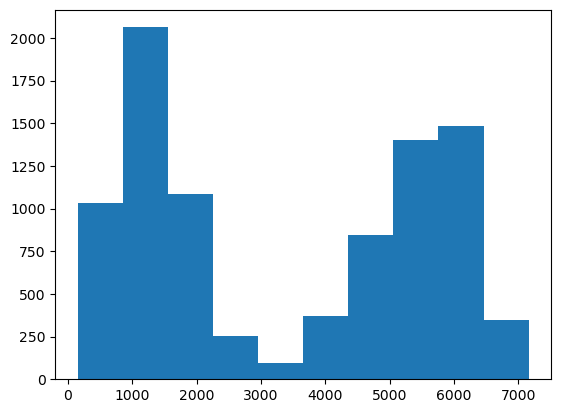

In [93]:
# original histogram for Bandwidth_GB_year
plt.hist(odf["Bandwidth_GB_Year"])

## D5. CSV

In [94]:
df.to_csv('df.csv')

## Principal Component Analysis

In [95]:
# start principal component analysis by defining the variables
pca_df = df[['Income','Tenure','MonthlyCharge','Bandwidth_GB_Year']]

In [96]:
# preview pca df
pca_df.head()

Income     Tenure  MonthlyCharge  Bandwidth_GB_Year
0  28561.990   6.795513     171.449762         904.536110
1  21704.770   1.156681     242.948015         800.982766
2  31769.615  15.754144     159.440398        2054.706961
3  18925.230  17.087227     120.249493        2164.579412
4  40074.190   1.670972     150.761216         271.493436

In [97]:
# normalize the variables
pca_normalized = (pca_df-pca_df.mean())/pca_df.std()
pca = PCA(n_components=pca_df.shape[1])
pca.fit(pca_normalized)

PCA(n_components=4)

In [98]:
# create pca dataframe
df_pca = pd.DataFrame(pca.transform(pca_normalized), columns=['PC1','PC2','PC3','PC4'])

In [99]:
# Create PCA loadings
loadings = pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4'],index=pca_df.columns)
loadings

PC1       PC2       PC3       PC4
Income             0.007122  0.680951  0.732294 -0.000238
Tenure             0.706112  0.037428 -0.041901 -0.705867
MonthlyCharge      0.034862 -0.731326  0.679697 -0.044252
Bandwidth_GB_Year  0.707205 -0.008178  0.000955  0.706960

In [100]:
# Selecting PCs
cov_matrix = np.dot(pca_normalized.T, pca_normalized) / pca_df.shape[0]

In [101]:
# calculate eigenvalues
eigenvalues = [np.dot(eigenvector.T,np.dot(cov_matrix,eigenvector)) for eigenvector in pca.components_]
eigenvalues

[1.8951205821625667, 1.005110659577462, 0.995309798496527, 0.1040589597634031]

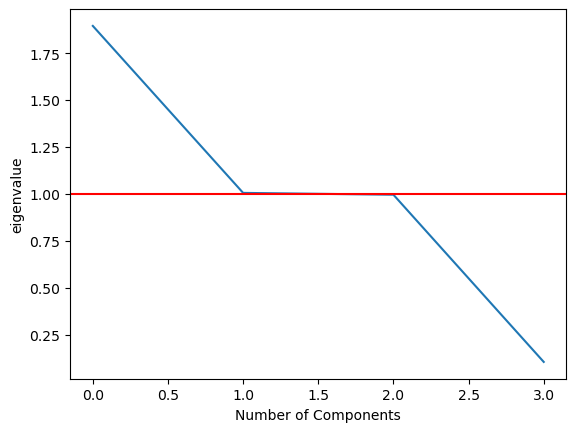

In [102]:
# plot scree plot

plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color="red")
plt.show()